In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl 
import os 

In [2]:
data_location = "data/video14"
output_location="output/video14"

In [27]:
df = pd.read_csv(os.path.join(data_location, "homeprices_banglore.csv"))
df.sample(5)

,area,bedrooms,price
8,1310,3,50.0
7,3300,4,155.0
18,2770,3,102.0
2,1440,3,62.0
6,2732,4,135.0


In [28]:
# perform data scaling using minmax scaler 
from sklearn.preprocessing import MinMaxScaler

# create one scale for area and bedrooms 
scale_x = MinMaxScaler() 

# create one scale for price 
scale_y =  MinMaxScaler()

# drop y column and perform scaling on X features 
X_scaled = scale_x.fit_transform(df.drop("price", axis=1))

# perform scaling of y 
y_scaled = scale_y.fit_transform(df["price"].values.reshape(-1, 1))

In [29]:
X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [30]:
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [32]:
y_scaled.reshape(y_scaled.shape[0])

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

``` 
Lets find the weights for w1 * area + w2 * bedrooms + bias = price


In [33]:
X_scaled.shape[1]

2

In [36]:
# Implement batch gradient descent using python code only 

def batch_gradient_descent(X, y_values, epochs, learning_rate=0.01):

    # get total number of features using shape function of the dataframe (in our example it will take 2)
    number_of_features = X.shape[1]

    # create weight matrix with values 1 
    w = np.ones(shape=(number_of_features))

    # create bias
    b=0
    
    # print(f"w: {w}")

    # create total samples from the shape of the vectors 
    total_samples = X.shape[0]

    # record the values 
    cost_list = [] 
    epoch_list = []

    for i in range(epochs):

        # calculate weighted sum using weights and bias 
        y_pred = np.dot(w, X.T) + b

        # calculate gradients 
        w_grad = -(number_of_features/total_samples) * (X.T.dot(y_values - y_pred))
        b_grad = -(number_of_features/total_samples) * np.sum(y_values - y_pred)

        # print (f"w_grad: {w_grad}, b_grad: {b_grad}")

        # adjust the weights 
        w = w - learning_rate * w_grad 
        b = b - learning_rate * b_grad

        # calculate cost 
        cost = np.mean(np.square(y_values - y_pred))

        cost_list.append(cost)
        epoch_list.append(i)


    return w, b, cost, cost_list, epoch_list

w,b,cost,cost_list,epoch_list = batch_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0]), 1000)

``` 
Plot this 

Text(0, 0.5, 'Cost')

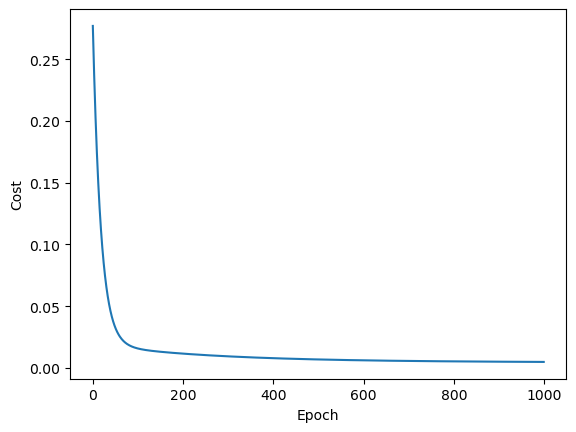

In [38]:
plt.plot(epoch_list, cost_list)
plt.xlabel("Epoch")
plt.ylabel("Cost")

``` 
Notice batch Gradient descent has a smooth curve when trying to converge 

``` 
Creating prediction function 
We want to get the data in the actual format not in Scaled format... 
```

In [42]:
def predict(area, bedrooms, w, b, scale_x, scale_y, values_scaled=False): 

    X_scaled = [area, bedrooms]

    if not values_scaled: 
        X_scaled = scale_x.transform([X_scaled])[0]

    price_scaled = w[0] * X_scaled[0] + w[1] * X_scaled[1] + b

    # now inverse the trasformation of y scaled value 
    price_value = scale_y.inverse_transform([[price_scaled]])

    return price_value[0][0]

predict(2600, 4, w, b, scale_x, scale_y, False)

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(124.97561189905038)

In [45]:
predict(1000, 2, w, b, scale_x, scale_y, False)

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(34.60197457980031)

In [46]:
predict(1500, 3, w, b, scale_x, scale_y, False)

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(70.50604143757819)

```
Stochastic Gradient Descent

In [66]:
# Implement batch gradient descent using python code only 
import random

def stochastic_gradient_descent(X, y_values, epochs, learning_rate=0.01):

    # get total number of features using shape function of the dataframe (in our example it will take 2)
    number_of_features = X.shape[1]

    # create weight matrix with values 1 
    w = np.ones(shape=(number_of_features))

    # create bias
    b=0
    
    # print(f"w: {w}")

    # create total samples from the shape of the vectors 
    total_samples = X.shape[0]

    # record the values 
    cost_list = [] 
    epoch_list = []

    for i in range(epochs):

        # get a random index in the data sample 
        random_index = random.randint(0, total_samples-1)

        # get random X and y from the data 
        X_sample = X[random_index]
        y_sample = y_values[random_index]

        # same code as batch gradient below 
        y_pred = np.dot(w, X_sample.T) + b

        # calculate gradients 
        w_grad = -(number_of_features/total_samples) * (X_sample.T.dot(y_sample - y_pred))
        b_grad = -(number_of_features/total_samples) * np.sum(y_sample - y_pred)

        # print (f"w_grad: {w_grad}, b_grad: {b_grad}")

        # adjust the weights 
        w = w - learning_rate * w_grad 
        b = b - learning_rate * b_grad

        # calculate cost 
        cost = np.mean(np.square(y_sample - y_pred))

        cost_list.append(cost)
        epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochastic_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0]), 10000)

In [67]:
w,b,cost

(array([0.66469087, 0.60541671]),
 np.float64(-0.17792104056392882),
 np.float64(0.0048654808183488454))

In [68]:
w_sgd,b_sgd,cost_sgd

(array([0.70979218, 0.67392406]),
 np.float64(-0.2273808388979935),
 np.float64(0.002181252804722281))

```
the values are the sample - plot this 

Text(0, 0.5, 'Cost')

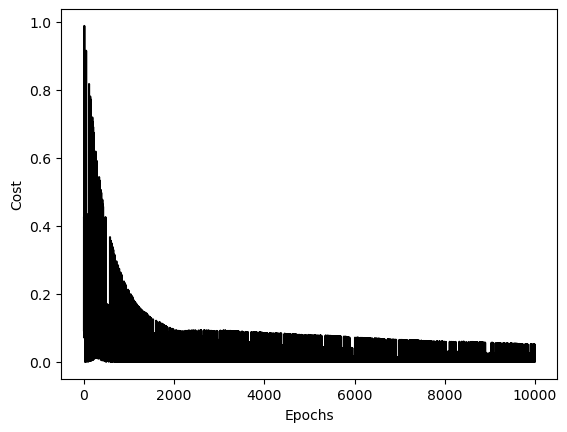

In [70]:
plt.plot(epoch_list_sgd, cost_list_sgd, "k-")
plt.xlabel("Epochs")
plt.ylabel("Cost")

In [65]:
predict(2600, 4, w_sgd, b_sgd, scale_x, scale_y)

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(156.35771955944494)

```
Implement Batch Gradient Descent - take random batches instead of complete training data (Batch GD) or one sample (SGD)

In [73]:
# Implement batch gradient descent using python code only 
import random

def mini_batch_gradient_descent(X, y_values, epochs, learning_rate=0.01):

    # get total number of features using shape function of the dataframe (in our example it will take 2)
    number_of_features = X.shape[1]

    # create weight matrix with values 1 
    w = np.ones(shape=(number_of_features))

    # create bias
    b=0
    
    # print(f"w: {w}")

    # create total samples from the shape of the vectors 
    total_samples = X.shape[0]

    # record the values 
    cost_list = [] 
    epoch_list = []


    for i in range(epochs):
        
        X_list = [] 
        y_list = [] 

        for i in range(10):
            random_index = random.randint(0, total_samples-1)
            X_sample = X[random_index]
            y_sample = y_values[random_index]

            X_list.append(X_sample)
            y_list.append(y_sample)


        # same code as batch gradient below 
        y_pred = np.dot(w, X_list.T) + b

        # calculate gradients 
        w_grad = -(number_of_features/total_samples) * (X_list.T.dot(y_list - y_pred))
        b_grad = -(number_of_features/total_samples) * np.sum(y_list - y_pred)

        # print (f"w_grad: {w_grad}, b_grad: {b_grad}")

        # adjust the weights 
        w = w - learning_rate * w_grad 
        b = b - learning_rate * b_grad

        # calculate cost 
        cost = np.mean(np.square(y_list - y_pred))

        cost_list.append(cost)
        epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_mb,b_mb,cost_mb,cost_list_mb,epoch_list_mb = stochastic_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0]), 10000)

In [74]:
w_mb, b_mb, cost_mb

(array([0.70367573, 0.67091341]),
 np.float64(-0.2283851372047094),
 np.float64(0.0019171754585134485))

In [75]:
predict(2600,4,w_mb, b_mb, scale_x, scale_y)

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.0611623204881)

Text(0, 0.5, 'Cost')

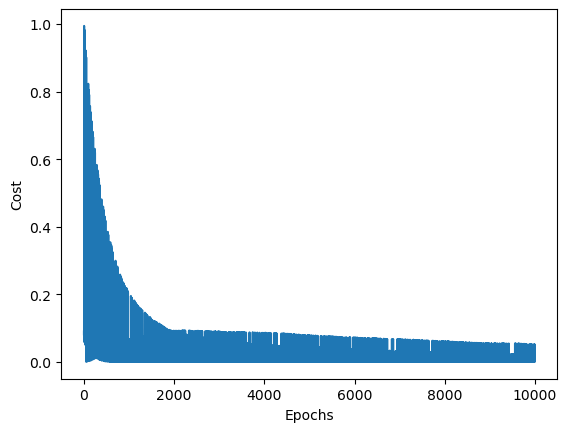

In [76]:
plt.plot(epoch_list_mb, cost_list_mb)
plt.xlabel("Epochs")
plt.ylabel("Cost")